# Maximum Likelihood Estimation

## Introduction

Maximum Likelihood Estimation (MLE) is a fundamental statistical method for estimating the parameters of a probability distribution by maximizing a likelihood function. Given observed data, MLE finds the parameter values that make the observed data most probable.

## Theoretical Foundation

### Likelihood Function

Given a set of independent and identically distributed (i.i.d.) observations $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ from a probability distribution with parameter(s) $\theta$, the **likelihood function** is defined as:

$$L(\theta | \mathbf{x}) = \prod_{i=1}^{n} f(x_i | \theta)$$

where $f(x_i | \theta)$ is the probability density function (PDF) for continuous distributions or probability mass function (PMF) for discrete distributions.

### Log-Likelihood

In practice, we work with the **log-likelihood** function due to numerical stability and mathematical convenience:

$$\ell(\theta | \mathbf{x}) = \ln L(\theta | \mathbf{x}) = \sum_{i=1}^{n} \ln f(x_i | \theta)$$

The maximum of $\ell(\theta)$ occurs at the same point as the maximum of $L(\theta)$ since the logarithm is a monotonically increasing function.

### Maximum Likelihood Estimator

The MLE $\hat{\theta}_{\text{MLE}}$ is obtained by solving:

$$\hat{\theta}_{\text{MLE}} = \arg\max_{\theta} \ell(\theta | \mathbf{x})$$

For differentiable likelihood functions, we find critical points by setting the **score function** to zero:

$$\frac{\partial \ell(\theta)}{\partial \theta} = 0$$

### Properties of MLE

Under certain regularity conditions, MLE has desirable asymptotic properties:

1. **Consistency**: $\hat{\theta}_{\text{MLE}} \xrightarrow{p} \theta_0$ as $n \to \infty$
2. **Asymptotic Normality**: $\sqrt{n}(\hat{\theta}_{\text{MLE}} - \theta_0) \xrightarrow{d} \mathcal{N}(0, I(\theta_0)^{-1})$
3. **Efficiency**: MLE achieves the Cramér-Rao lower bound asymptotically

where $I(\theta)$ is the Fisher Information:

$$I(\theta) = -\mathbb{E}\left[\frac{\partial^2 \ell(\theta)}{\partial \theta^2}\right]$$

## Example 1: Normal Distribution

For a normal distribution $\mathcal{N}(\mu, \sigma^2)$, the PDF is:

$$f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)$$

The log-likelihood for $n$ observations is:

$$\ell(\mu, \sigma^2) = -\frac{n}{2}\ln(2\pi) - \frac{n}{2}\ln(\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i - \mu)^2$$

Taking derivatives and setting to zero yields the MLEs:

$$\hat{\mu}_{\text{MLE}} = \bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i$$

$$\hat{\sigma}^2_{\text{MLE}} = \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize

# Set random seed for reproducibility
np.random.seed(42)

# True parameters for normal distribution
true_mu = 5.0
true_sigma = 2.0

# Generate sample data
n_samples = 100
data = np.random.normal(true_mu, true_sigma, n_samples)

# Analytical MLE estimates
mu_mle = np.mean(data)
sigma_mle = np.sqrt(np.mean((data - mu_mle)**2))

print(f"True parameters: μ = {true_mu}, σ = {true_sigma}")
print(f"MLE estimates: μ̂ = {mu_mle:.4f}, σ̂ = {sigma_mle:.4f}")

True parameters: μ = 5.0, σ = 2.0
MLE estimates: μ̂ = 4.7923, σ̂ = 1.8072


In [2]:
# Define negative log-likelihood function for normal distribution
def neg_log_likelihood_normal(params, data):
    mu, sigma = params
    if sigma <= 0:
        return np.inf
    n = len(data)
    nll = (n/2) * np.log(2 * np.pi) + n * np.log(sigma) + \
          (1/(2 * sigma**2)) * np.sum((data - mu)**2)
    return nll

# Numerical optimization to find MLE
initial_guess = [0.0, 1.0]
result = minimize(neg_log_likelihood_normal, initial_guess, args=(data,),
                  method='L-BFGS-B', bounds=[(-np.inf, np.inf), (1e-6, np.inf)])

mu_opt, sigma_opt = result.x
print(f"Numerical optimization: μ̂ = {mu_opt:.4f}, σ̂ = {sigma_opt:.4f}")

Numerical optimization: μ̂ = 4.7923, σ̂ = 1.8072


## Example 2: Exponential Distribution

For an exponential distribution with rate parameter $\lambda$, the PDF is:

$$f(x | \lambda) = \lambda e^{-\lambda x}, \quad x \geq 0$$

The log-likelihood is:

$$\ell(\lambda) = n \ln(\lambda) - \lambda \sum_{i=1}^{n} x_i$$

The MLE is:

$$\hat{\lambda}_{\text{MLE}} = \frac{n}{\sum_{i=1}^{n} x_i} = \frac{1}{\bar{x}}$$

True parameter: λ = 0.5
MLE estimate: λ̂ = 0.5319


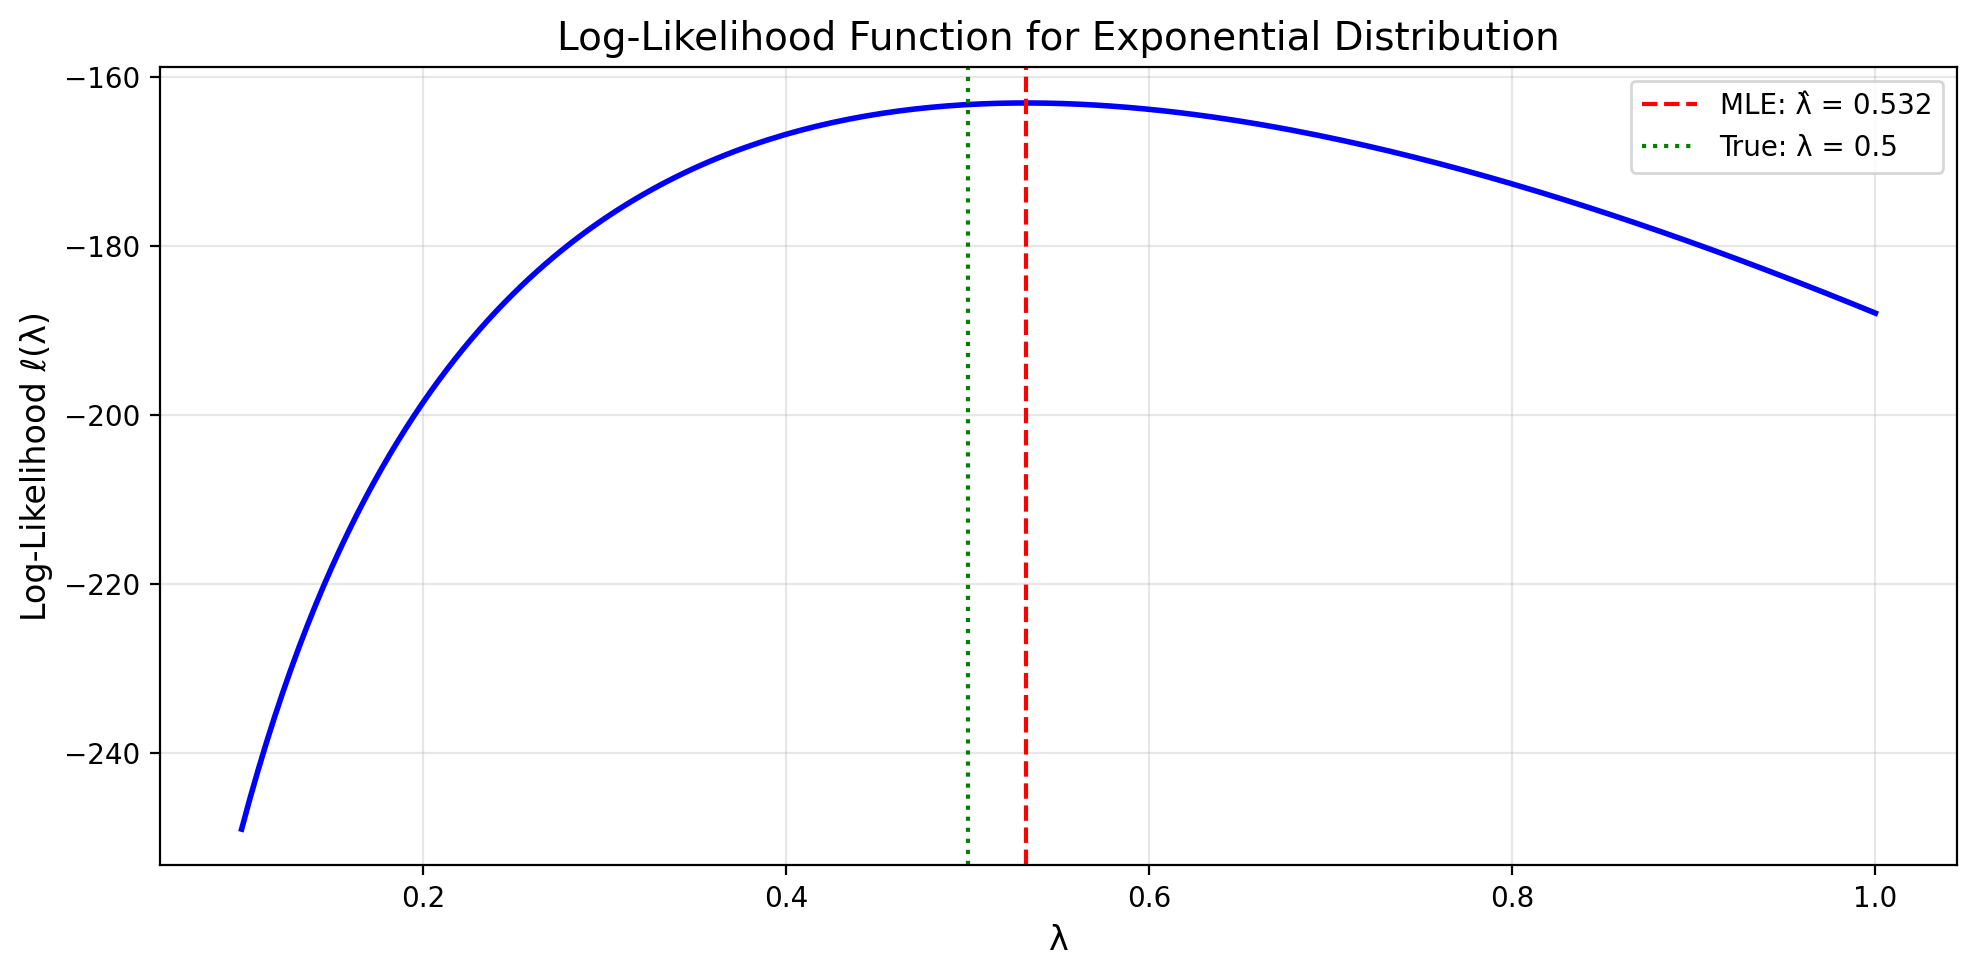

In [3]:
# True parameter for exponential distribution
true_lambda = 0.5

# Generate exponential data
exp_data = np.random.exponential(1/true_lambda, n_samples)

# Analytical MLE
lambda_mle = 1 / np.mean(exp_data)

print(f"True parameter: λ = {true_lambda}")
print(f"MLE estimate: λ̂ = {lambda_mle:.4f}")

# Visualize log-likelihood function
lambda_range = np.linspace(0.1, 1.0, 200)
log_likelihood = n_samples * np.log(lambda_range) - lambda_range * np.sum(exp_data)

plt.figure(figsize=(10, 5))
plt.plot(lambda_range, log_likelihood, 'b-', linewidth=2)
plt.axvline(x=lambda_mle, color='r', linestyle='--', label=f'MLE: λ̂ = {lambda_mle:.3f}')
plt.axvline(x=true_lambda, color='g', linestyle=':', label=f'True: λ = {true_lambda}')
plt.xlabel('λ', fontsize=12)
plt.ylabel('Log-Likelihood ℓ(λ)', fontsize=12)
plt.title('Log-Likelihood Function for Exponential Distribution', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Example 3: Poisson Distribution

For a Poisson distribution with parameter $\lambda$, the PMF is:

$$P(X = k | \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}$$

The log-likelihood is:

$$\ell(\lambda) = \sum_{i=1}^{n} \left( x_i \ln(\lambda) - \lambda - \ln(x_i!) \right)$$

The MLE is simply the sample mean:

$$\hat{\lambda}_{\text{MLE}} = \bar{x}$$

In [4]:
# True parameter for Poisson distribution
true_lambda_poisson = 3.5

# Generate Poisson data
poisson_data = np.random.poisson(true_lambda_poisson, n_samples)

# Analytical MLE
lambda_mle_poisson = np.mean(poisson_data)

print(f"True parameter: λ = {true_lambda_poisson}")
print(f"MLE estimate: λ̂ = {lambda_mle_poisson:.4f}")

True parameter: λ = 3.5
MLE estimate: λ̂ = 3.4500


## Visualization: Likelihood Surface for Normal Distribution

We now visualize the likelihood surface as a function of both $\mu$ and $\sigma$ for the normal distribution example.

In [5]:
# Create grid for likelihood surface
mu_range = np.linspace(3, 7, 100)
sigma_range = np.linspace(1, 3, 100)
MU, SIGMA = np.meshgrid(mu_range, sigma_range)

# Calculate log-likelihood over the grid
LOG_LIKELIHOOD = np.zeros_like(MU)
for i in range(len(sigma_range)):
    for j in range(len(mu_range)):
        mu_val = mu_range[j]
        sigma_val = sigma_range[i]
        LOG_LIKELIHOOD[i, j] = -neg_log_likelihood_normal([mu_val, sigma_val], data)

/tmp/ipykernel_158015/2697384515.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax3.boxplot(mu_estimates.T, labels=[str(n) for n in sample_sizes])


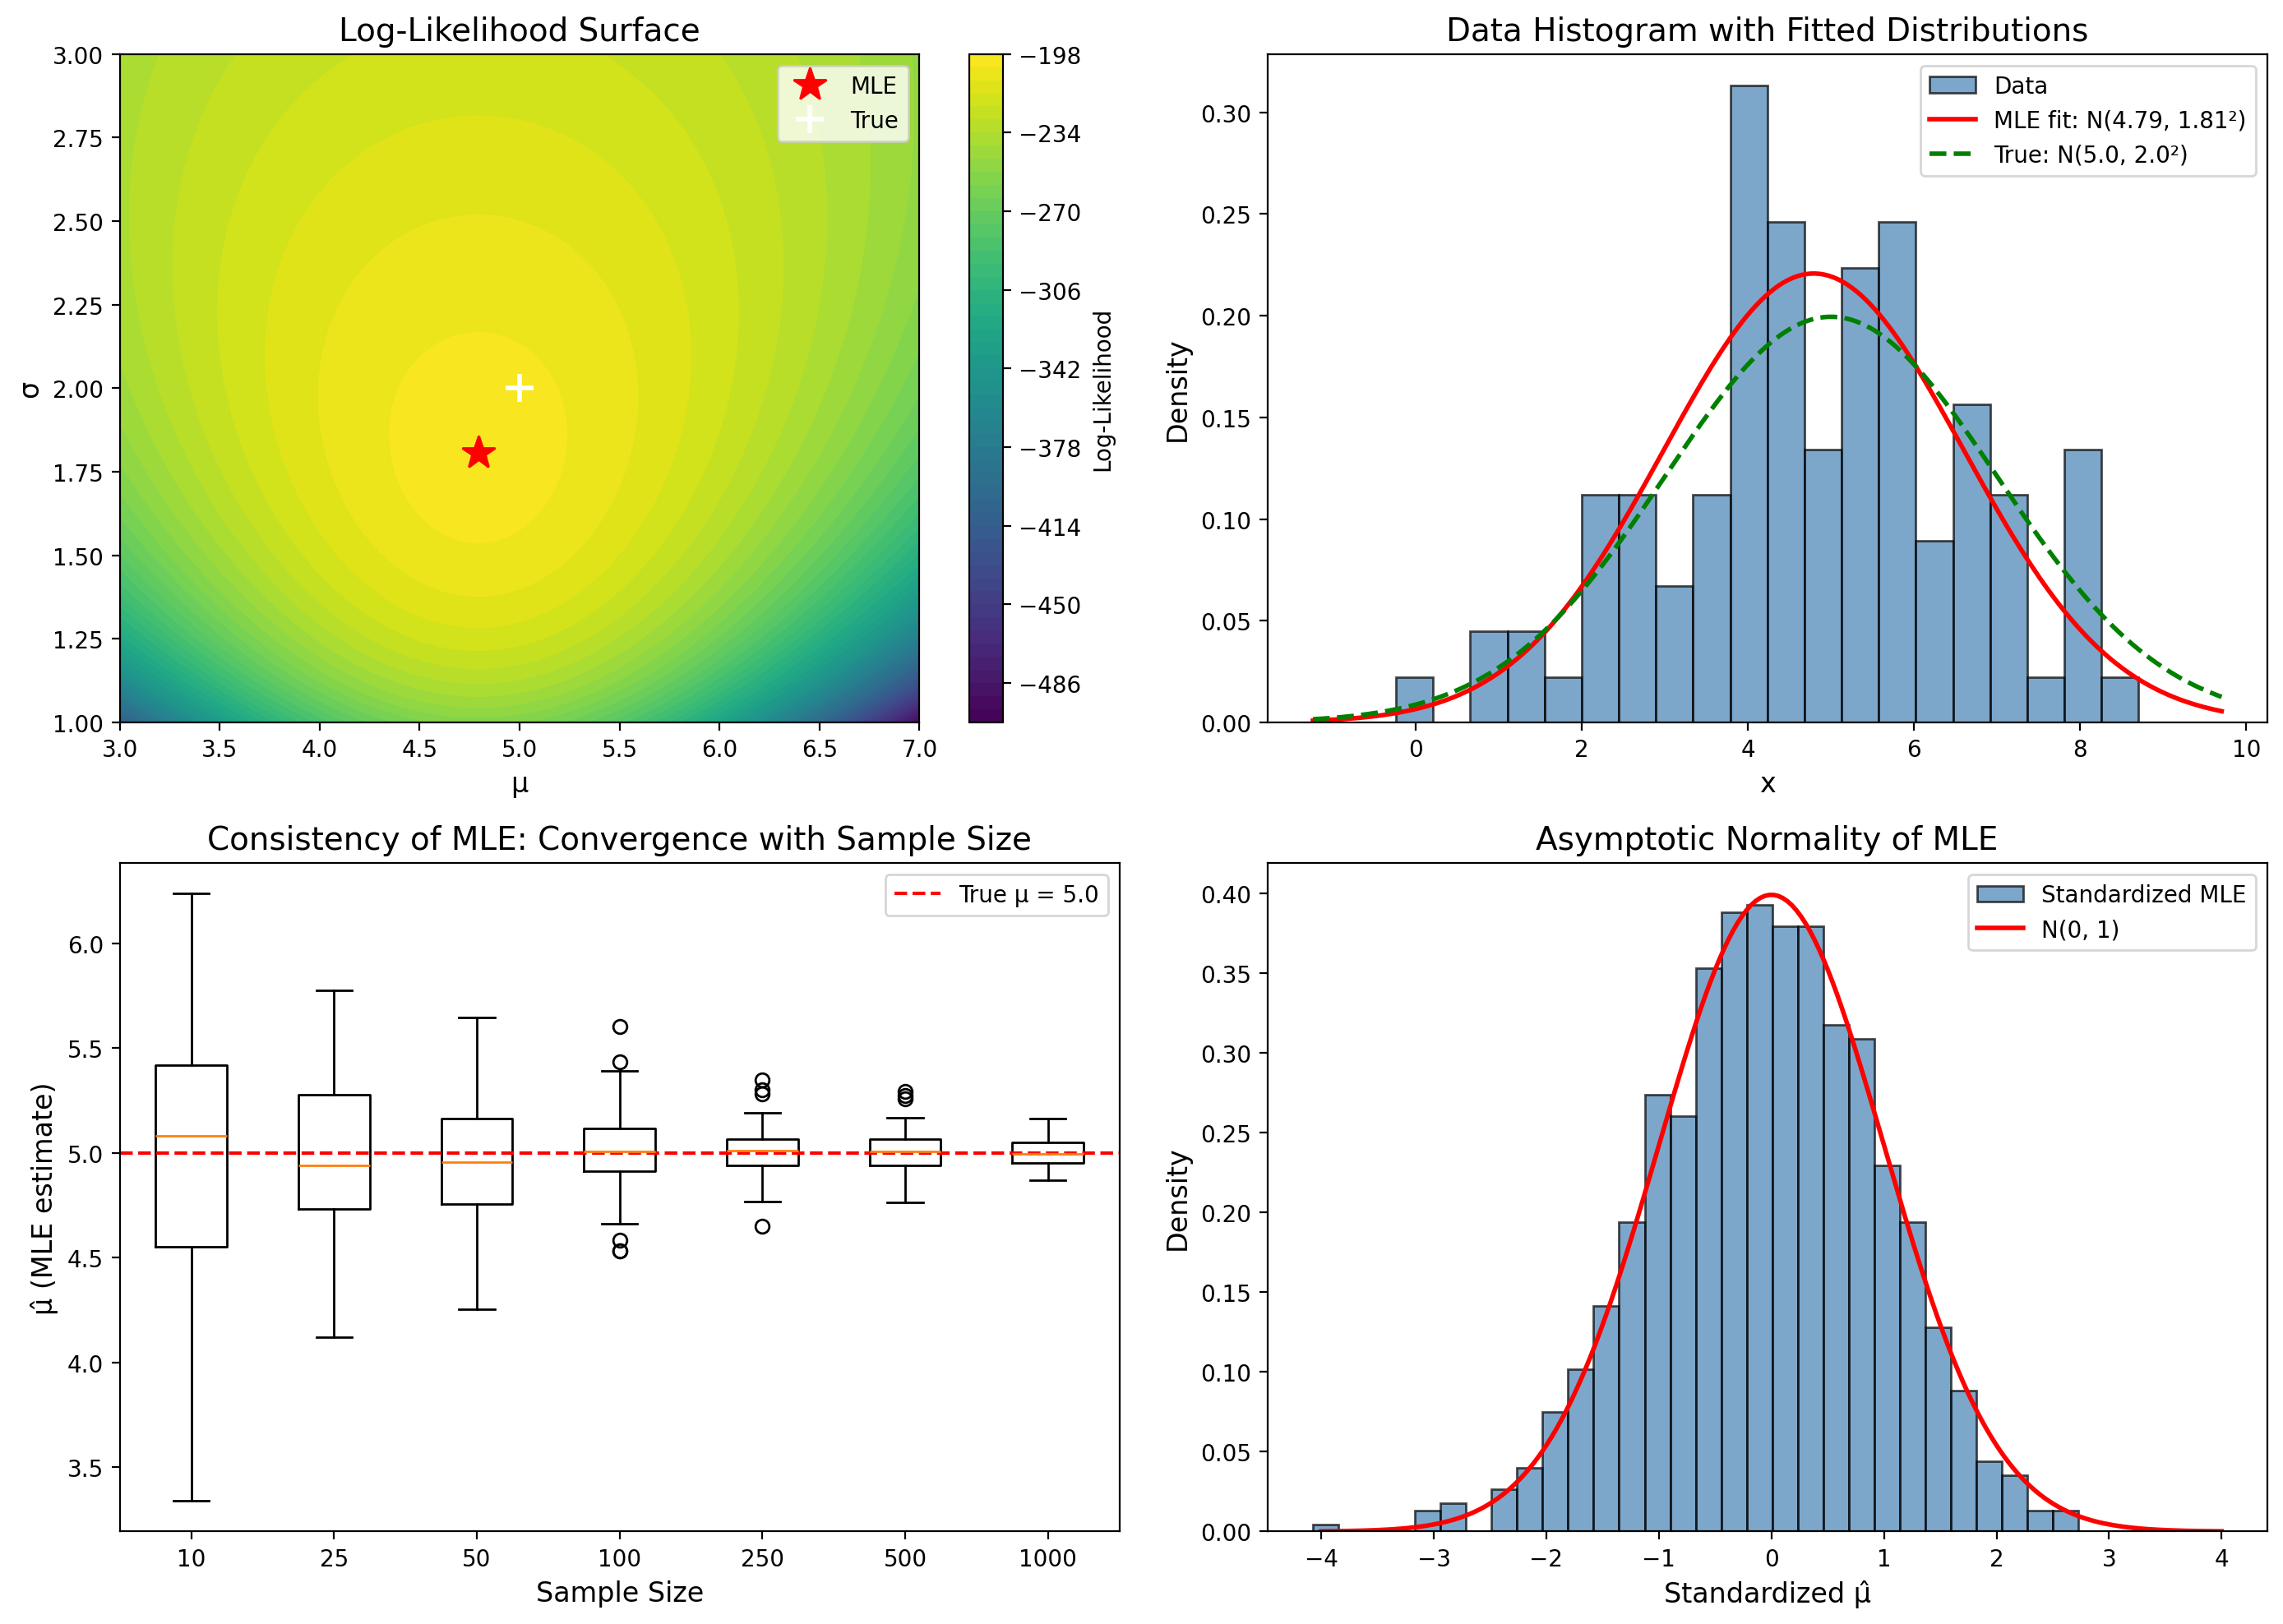


Figure saved to plot.png


In [6]:
# Create comprehensive visualization
fig = plt.figure(figsize=(14, 10))

# Plot 1: Contour plot of likelihood surface
ax1 = fig.add_subplot(2, 2, 1)
contour = ax1.contourf(MU, SIGMA, LOG_LIKELIHOOD, levels=50, cmap='viridis')
ax1.plot(mu_mle, sigma_mle, 'r*', markersize=15, label='MLE')
ax1.plot(true_mu, true_sigma, 'w+', markersize=12, markeredgewidth=2, label='True')
ax1.set_xlabel('μ', fontsize=12)
ax1.set_ylabel('σ', fontsize=12)
ax1.set_title('Log-Likelihood Surface', fontsize=14)
ax1.legend(loc='upper right')
plt.colorbar(contour, ax=ax1, label='Log-Likelihood')

# Plot 2: Histogram with fitted distribution
ax2 = fig.add_subplot(2, 2, 2)
ax2.hist(data, bins=20, density=True, alpha=0.7, color='steelblue', edgecolor='black', label='Data')
x_plot = np.linspace(data.min() - 1, data.max() + 1, 200)
ax2.plot(x_plot, stats.norm.pdf(x_plot, mu_mle, sigma_mle), 'r-', 
         linewidth=2, label=f'MLE fit: N({mu_mle:.2f}, {sigma_mle:.2f}²)')
ax2.plot(x_plot, stats.norm.pdf(x_plot, true_mu, true_sigma), 'g--', 
         linewidth=2, label=f'True: N({true_mu}, {true_sigma}²)')
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.set_title('Data Histogram with Fitted Distributions', fontsize=14)
ax2.legend()

# Plot 3: Consistency of MLE - varying sample sizes
ax3 = fig.add_subplot(2, 2, 3)
sample_sizes = [10, 25, 50, 100, 250, 500, 1000]
n_trials = 100
mu_estimates = np.zeros((len(sample_sizes), n_trials))

for i, n in enumerate(sample_sizes):
    for j in range(n_trials):
        sample = np.random.normal(true_mu, true_sigma, n)
        mu_estimates[i, j] = np.mean(sample)

ax3.boxplot(mu_estimates.T, labels=[str(n) for n in sample_sizes])
ax3.axhline(y=true_mu, color='r', linestyle='--', label=f'True μ = {true_mu}')
ax3.set_xlabel('Sample Size', fontsize=12)
ax3.set_ylabel('μ̂ (MLE estimate)', fontsize=12)
ax3.set_title('Consistency of MLE: Convergence with Sample Size', fontsize=14)
ax3.legend()

# Plot 4: Asymptotic normality demonstration
ax4 = fig.add_subplot(2, 2, 4)
n_large = 500
n_simulations = 1000
mu_estimates_large = np.array([np.mean(np.random.normal(true_mu, true_sigma, n_large)) 
                                for _ in range(n_simulations)])

# Standardize the estimates
standardized = np.sqrt(n_large) * (mu_estimates_large - true_mu) / true_sigma

ax4.hist(standardized, bins=30, density=True, alpha=0.7, color='steelblue', 
         edgecolor='black', label='Standardized MLE')
z = np.linspace(-4, 4, 200)
ax4.plot(z, stats.norm.pdf(z), 'r-', linewidth=2, label='N(0, 1)')
ax4.set_xlabel('Standardized μ̂', fontsize=12)
ax4.set_ylabel('Density', fontsize=12)
ax4.set_title('Asymptotic Normality of MLE', fontsize=14)
ax4.legend()

plt.tight_layout()
plt.savefig('maximum_likelihood_estimation_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to plot.png")

## Fisher Information and Confidence Intervals

The Fisher Information provides a measure of the amount of information that an observable random variable carries about an unknown parameter. For the normal distribution with known $\sigma$, the Fisher Information for $\mu$ is:

$$I(\mu) = \frac{n}{\sigma^2}$$

This allows us to construct asymptotic confidence intervals:

$$\hat{\mu} \pm z_{\alpha/2} \sqrt{I(\mu)^{-1}} = \hat{\mu} \pm z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$$

In [7]:
# Calculate Fisher Information and confidence interval
fisher_info = n_samples / sigma_mle**2
se_mu = 1 / np.sqrt(fisher_info)  # Standard error

# 95% confidence interval
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha/2)
ci_lower = mu_mle - z_critical * se_mu
ci_upper = mu_mle + z_critical * se_mu

print(f"MLE estimate: μ̂ = {mu_mle:.4f}")
print(f"Fisher Information: I(μ) = {fisher_info:.4f}")
print(f"Standard Error: SE(μ̂) = {se_mu:.4f}")
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"True μ = {true_mu} {'is' if ci_lower <= true_mu <= ci_upper else 'is NOT'} in the CI")

MLE estimate: μ̂ = 4.7923
Fisher Information: I(μ) = 30.6177
Standard Error: SE(μ̂) = 0.1807
95% Confidence Interval: [4.4381, 5.1465]
True μ = 5.0 is in the CI


## Conclusion

Maximum Likelihood Estimation provides a principled and widely applicable framework for parameter estimation. Key takeaways:

1. **Generality**: MLE can be applied to any parametric distribution
2. **Optimality**: Under regularity conditions, MLE is asymptotically efficient
3. **Practical Implementation**: Can be computed analytically or numerically
4. **Inference**: Fisher Information enables confidence interval construction

The examples demonstrated MLE for normal, exponential, and Poisson distributions, showcasing both analytical solutions and numerical optimization approaches.